# Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/szabonikolett/Desktop/Ironhack-Labs/lab-imbalanced-data/files_for_lab/customer_churn.csv')

In [3]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower().replace(' ', '_')) 
data.columns = cols

data.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               paymentmethod monthlycharges  totalcharges churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.shape

(7043, 21)

In [5]:
data.isna().sum() 

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [7]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
data.describe()

seniorcitizen       tenure  monthlycharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [9]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
data['seniorcitizen'].value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

In [11]:
data['contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract, dtype: int64

In [12]:
data['tenure'].value_counts() # length of subscription in weeks

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

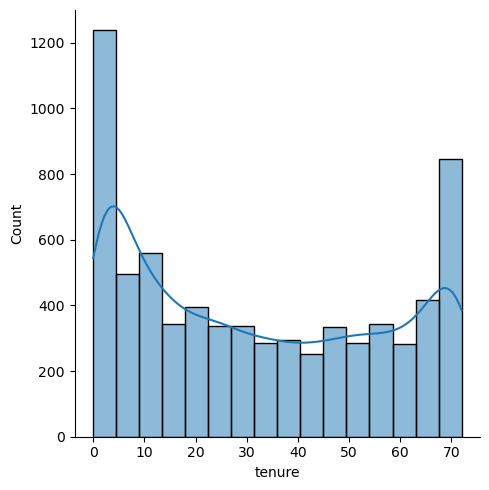

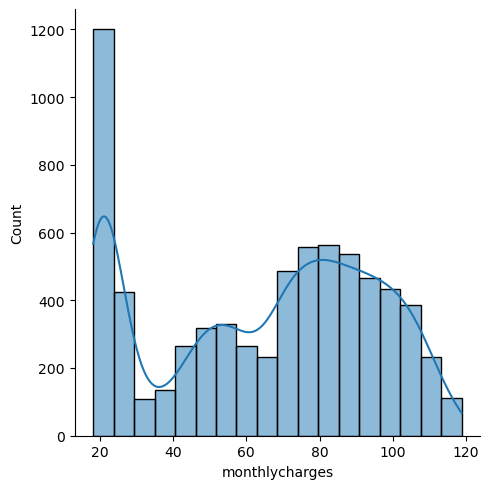

In [13]:
sns.displot(data['tenure'], kde=True) # ,kde=True draws the line in 
sns.displot(data['monthlycharges'], kde=True)
plt.show()

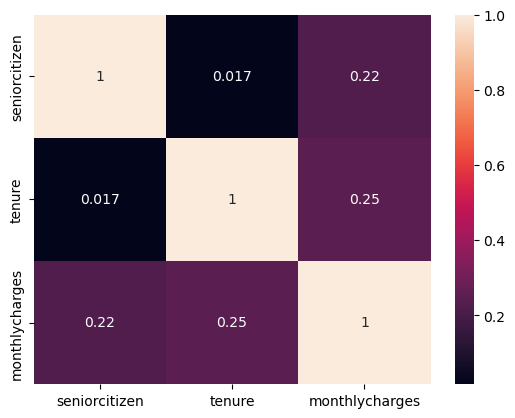

In [14]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# insignificant correlation between the features 

In [15]:
# the task is to build the model based on these 4 columns, so saving them as df
data = data[['tenure', 'seniorcitizen', 'monthlycharges', 'churn']]
data

tenure  seniorcitizen  monthlycharges churn
0          1              0           29.85    No
1         34              0           56.95    No
2          2              0           53.85   Yes
3         45              0           42.30    No
4          2              0           70.70   Yes
...      ...            ...             ...   ...
7038      24              0           84.80    No
7039      72              0          103.20    No
7040      11              0           29.60    No
7041       4              1           74.40   Yes
7042      66              0          105.65    No

[7043 rows x 4 columns]

In [16]:
data.dtypes

tenure              int64
seniorcitizen       int64
monthlycharges    float64
churn              object
dtype: object

In [17]:
# converting boolean mask to treat churn as numerical
def convert(x):
    if x == 'Yes':
        return 1
    else:
        return 0

X-y-split AND train-test-split BEFORE I apply transformations, then train transformation on training set only

In [18]:
X = data[['tenure', 'seniorcitizen', 'monthlycharges']] # features 
y = data['churn'] # target
y = y.apply(convert) # fixing churn dtype

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# no numerical / categorical split, all my columns are numerical

In [20]:
# scaling trainset 
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train) # fit ONLY on numericals_train
X_norm = transformer.transform(X_train) # transform BOTH numericals_train
X_train_scale = pd.DataFrame(X_norm, columns=X_train.columns) # using X_train's columns

X_normtest = transformer.transform(X_test) # and numerical_test
X_test_scale = pd.DataFrame(X_normtest, columns=X_test.columns)

In [22]:
X_train_scale

tenure  seniorcitizen  monthlycharges
0     0.291667            0.0        0.464375
1     0.750000            0.0        0.786746
2     0.013889            0.0        0.051819
3     0.055556            0.0        0.517688
4     0.000000            0.0        0.434978
...        ...            ...             ...
5629  0.013889            0.0        0.764823
5630  0.319444            0.0        0.725959
5631  0.166667            0.0        0.028899
5632  0.166667            1.0        0.809168
5633  0.361111            0.0        0.015446

[5634 rows x 3 columns]

In [24]:
X_test_scale

tenure  seniorcitizen  monthlycharges
0     0.013889            0.0        0.065272
1     0.569444            0.0        0.069756
2     0.722222            0.0        0.010962
3     0.013889            0.0        0.578974
4     0.930556            0.0        0.321873
...        ...            ...             ...
1404  0.888889            0.0        0.498754
1405  0.708333            0.0        0.914798
1406  0.236111            0.0        0.016442
1407  0.958333            0.0        0.256104
1408  0.013889            0.0        0.130543

[1409 rows x 3 columns]

In [25]:
# have to reset index or it's not matching and shows NaN while there were originally none
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True) 

In [26]:
traindata = pd.concat([X_train_scale, y_train],axis=1)
traindata

tenure  seniorcitizen  monthlycharges  churn
0     0.291667            0.0        0.464375      0
1     0.750000            0.0        0.786746      0
2     0.013889            0.0        0.051819      1
3     0.055556            0.0        0.517688      1
4     0.000000            0.0        0.434978      0
...        ...            ...             ...    ...
5629  0.013889            0.0        0.764823      1
5630  0.319444            0.0        0.725959      0
5631  0.166667            0.0        0.028899      0
5632  0.166667            1.0        0.809168      1
5633  0.361111            0.0        0.015446      0

[5634 rows x 4 columns]

In [ ]:
# Model 1: Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scale, y_train)
LR.score(X_test_scale, y_test)

0.8041163946061036

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

#pred = LR.predict(X_test_scaled)
pred = LR.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred)) # what is my real data
print("recall: ",recall_score(y_test,pred)) # what is my prediction 
print("f1: ",f1_score(y_test,pred))

precision:  0.6932270916334662
recall:  0.46648793565683644
f1:  0.5576923076923076


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[959,  77],
       [199, 174]])

In [ ]:
# in 959 cases predicted no correctly, in 77 cases predicted yes incorrectly
# in 199 predicted no incorrectly, in 174 cases predicted yes correctly

While the LR score is relatively acceptable (0.80), after checking the precision aka accuracy and the recall along with the f1 scores, it is clear that the model is faulty. The precision score is 69% which is quite low, not justifable to take the risk making that many incorrect predictions. 

In [ ]:
#from sklearn.preprocessing import StandardScaler
# choosing the Standardscaler to check outliers, based on the assumption that someone with a x year long subscription would qualify as a loyal customer and less likely to terminate contract

#transformer = StandardScaler().fit(X_train)
#X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

# the only tranformation applied to the numerics, also can immediately transform the X_test as well
#X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
#X_train_scaled.head()

In [ ]:
#y_train.head()

In [ ]:
#y_train = y_train.reset_index(drop=True) 

# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...

#y_test = y_test.reset_index(drop=True) 

In [ ]:
#y_train.head()

<AxesSubplot:>

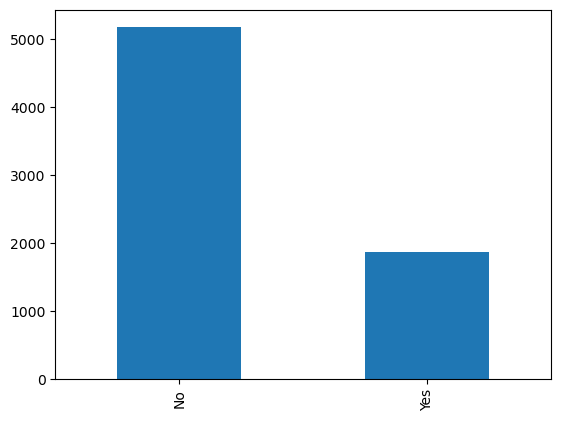

In [30]:
count_classes = data['churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [31]:
5100/(5100+1900) # data is imbalanced 72% vs 28% 

0.7285714285714285

### Practising: OVERSAMPLING  -  only on the train set, test set must reflect the reality

In [32]:
from sklearn.utils import resample

In [33]:
#traindata = pd.concat([X_train_scaled, y_train],axis=1)
#train.head()

In [34]:
no_churn = traindata[traindata['churn'] == 0]
yes_churn = traindata[traindata['churn'] == 1]

In [35]:
# separate majority/minority 

display(no_churn.shape)
display(yes_churn.shape)

(4138, 4)

(1496, 4)

In [36]:
# oversampling minority (=yes)

yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

# replace=True -> a row has a chance to be replaced more than once

In [37]:
# now working with the same size of the sets
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(10)

(4138, 4)

(4138, 4)

tenure  seniorcitizen  monthlycharges  churn
2564  0.347222            0.0        0.402093      1
2062  0.013889            0.0        0.720478      1
4513  0.222222            1.0        0.206776      1
3045  0.513889            1.0        0.825610      1
2815  0.125000            0.0        0.369706      1
5137  0.013889            0.0        0.272546      1
3816  0.555556            1.0        0.833084      1
1007  0.027778            0.0        0.493274      1
2224  0.430556            0.0        0.726457      1
4046  0.125000            1.0        0.809168      1

In [42]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled # index is not in order due to manipulated sampling

tenure  seniorcitizen  monthlycharges  churn
0     0.291667            0.0        0.464375      0
1     0.750000            0.0        0.786746      0
4     0.000000            0.0        0.434978      0
5     0.097222            0.0        0.511211      0
6     0.444444            0.0        0.006976      0
...        ...            ...             ...    ...
54    0.375000            0.0        0.760339      1
1364  0.055556            1.0        0.564524      1
4912  0.166667            0.0        0.811659      1
4765  0.291667            1.0        0.782760      1
1522  0.111111            0.0        0.848032      1

[8276 rows x 4 columns]

In [43]:
y_train_over = train_oversampled['churn'].copy() # outcome of the train oversampled
X_train_over = train_oversampled.drop('churn',axis = 1).copy()

In [44]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
# upsampling = oversampling

LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5134168157423972
recall:  0.7694369973190348
f1:  0.6158798283261803


In [ ]:
# The success of the oversampling is questionable, recall and f1 scores improved while precision decreased. 

### Practising: UNDERSAMPLING majority

In [45]:
no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [46]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1496, 4)

(1496, 4)

In [47]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled], axis=0)
train_undersampled

tenure  seniorcitizen  monthlycharges  churn
2     0.013889            0.0        0.051819      1
3     0.055556            0.0        0.517688      1
8     0.263889            0.0        0.213254      1
10    0.291667            1.0        0.506726      1
26    0.111111            1.0        0.735924      1
...        ...            ...             ...    ...
2720  0.819444            0.0        0.613852      0
2954  0.777778            0.0        0.016941      0
2140  0.152778            0.0        0.321873      0
1031  0.958333            0.0        0.974091      0
665   0.861111            0.0        0.558545      0

[2992 rows x 4 columns]

In [48]:
y_train_under = train_undersampled['churn'].copy()
X_train_under = train_undersampled.drop('churn',axis = 1).copy()

In [49]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5115452930728241
recall:  0.7721179624664879
f1:  0.6153846153846153


# SMOTE 

In [50]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scale,y_train)

In [52]:
X_train_SMOTE.shape

(8276, 3)

In [53]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5125448028673835
recall:  0.7667560321715817
f1:  0.6143931256713211


In [54]:
confusion_matrix(y_test,pred)

array([[764, 272],
       [ 87, 286]])